### Preliminary Findings:
- Only high school students take the SAT, so we'll want to focus on high schools.
- New York City is made up of five boroughs, which are essentially distinct regions. 
- New York City schools fall within several different school districts, each of which can contains dozens of schools.
- Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
- Each school in New York City has a unique code called a DBN, or district borough number.
- Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.

In [4]:
!ls ./new\ york\ sat\ data/ 

ap_2010.csv      demographics.csv sat_results.csv
class_size.csv   graduation.csv   survey_all.txt
datadict.png     hs_directory.csv survey_d75.txt


In [5]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}

In [6]:
for f in data_files:
    d = pd.read_csv("./new york sat data/{0}".format(f))
    key_name = f.replace(".csv", "")
    data[key_name] = d
    
for k,v in data.items():
    print(k)

ap_2010
class_size
demographics
graduation
hs_directory
sat_results


In [7]:
data['ap_2010'].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


- Each data set appears to either have a DBN column, or the information we need to create one. That means we can use a - DBN column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical DBNs, then group all of their columns together in a single data set.
- Some fields look interesting for mapping -- particularly Location 1, which contains coordinates inside a larger string.
- Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate DBN values). - That means we’ll have to do some preprocessing to ensure that each DBN is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.

In [8]:
all_survey = pd.read_csv('./new york sat data/survey_all.txt', delimiter='\t', encoding='windows-1252')
d75_survey = pd.read_csv('./new york sat data/survey_d75.txt', delimiter='\t', encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


- There are over 2000 columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.
- The survey data has a dbn column that we'll want to convert to uppercase (DBN). The conversion will make the column name consistent with the other data sets.
- From the data dictionary at https://data.cityofnewyork.us/Education/2010-2011-NYC-School-Survey/mnz3-dyi8 we can see the relevant columns needed

In [33]:
Image?

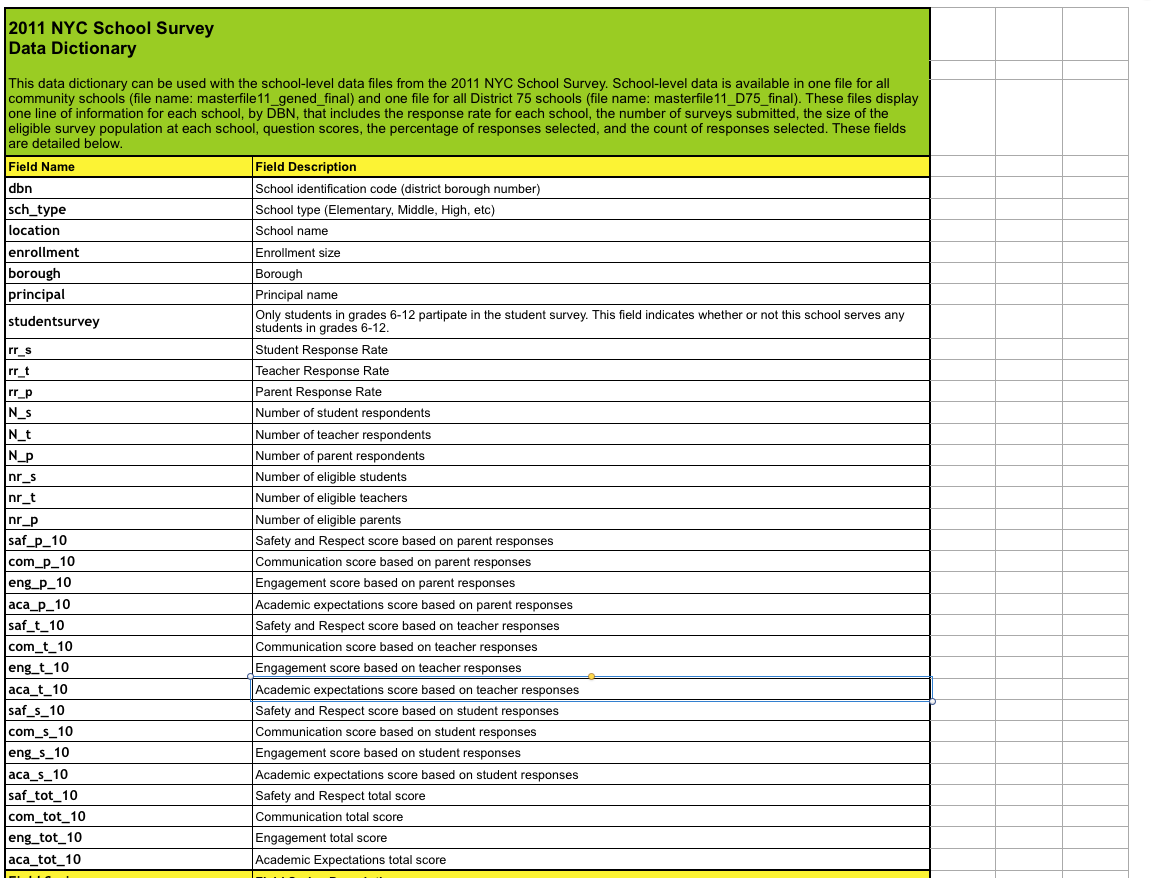

In [35]:
from IPython.display import Image
Image(data='./new york sat data/datadict.png', width = 500, height=500)

In [10]:
# first, copy data from dbn to DBN column
survey['DBN'] = survey['dbn']
survey.shape

(1702, 2774)

In [11]:
relev_col = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

# for loc
    # : gives it all the indices (survey.loc[:] would be everything)
    # relev_col gives it the columns to filter 
filtered_survey = survey.loc[0, relev_col]
data['survey'] = filtered_survey
filtered_survey.shape

(2, 23)

In [12]:
filtered_survey.head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
0,75K004,38.0,90,72,8.0,81.0,244.0,9.1,8.6,8.4,...,6.4,6.4,7.6,5.8,7.6,6.3,8.0,7.0,7.5,7.1


In [13]:
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5,DBN
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0,01M015
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0,01M019
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0,01M020
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0,01M034
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0,01M063


### From the data, we can see that the DBN is just the CSD added to the school code. So we can make the DBN for data['class_size'] which does not have that column. The first two characters of the DBN are the CSD, padded with a 1 in front if there is only one integer. 

In [16]:
data['hs_directory']['DBN'] = data['hs_directory']['dbn']

In [28]:
def pad_csd(int):
    int_str = str(int)
    if len(int_str) > 1:
        return int_str
    else:
        return "0" + int_str
        # also could be "return int_str.zfill(2)"

In [29]:
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)

In [30]:
data["class_size"]["padded_csd"].head()

0    01
1    01
2    01
3    01
4    01
Name: padded_csd, dtype: object

In [38]:
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
data["class_size"]['DBN'].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

#### Let us now convert all number strings to ints in the SAT Scores, and combine them so that we just have one number to work with. 
#### The argument 'errors="coerce"' means that any entries that can't be converted will instead be converted to NaNs

In [39]:
data['sat_results'].describe()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
count,478,478,478,478,478,478
unique,478,478,175,164,173,163
top,32K545,ASTOR COLLEGIATE ACADEMY,s,s,s,s
freq,1,1,57,57,57,57


In [41]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

In [44]:
data['sat_results']['sat_score'] = data['sat_results']['SAT Math Avg. Score'] + data['sat_results']['SAT Critical Reading Avg. Score'] + data['sat_results']['SAT Writing Avg. Score']
data['sat_results']['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

### Now let us parse the coordinates for each school

In [56]:
import re
def parsa(str):
    return re.findall("\(.+\)", str)
print(parsa("1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)"))

['(40.8276026690005, -73.90447525699966)']


In [55]:
def find_lat(loc):
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

In [57]:
find_lat('1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)')

'40.8276026690005'

In [65]:
data['hs_directory']['Location 1'].head(3)

0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026...
2    1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
Name: Location 1, dtype: object

In [66]:
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(find_lat)
data['hs_directory']['lat'].head(3)

0     40.67029890700047
1      40.8276026690005
2    40.842414068000494
Name: lat, dtype: object

In [71]:
def find_long(loc):
    coords = re.findall("\(.+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "")
    return lon
find_long('1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)')

' -73.90447525699966'

In [73]:
data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(find_long)

In [74]:
colly = ['lat', 'lon']
for i in colly:
    data['hs_directory'][i] = pd.to_numeric(data['hs_directory'][i], errors='coerce')